In [80]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [82]:
from pycaret.datasets import get_data
from pycaret.classification import *

import pandas as pd
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
df_wine = pd.read_csv('/content/winequality-red.csv',sep=';')
df_wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [83]:
df_wine.shape

(1599, 12)

In [84]:
data = df_wine.sample(frac=0.8, random_state=123)
data_unseen = df_wine.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1279, 12)
Unseen Data For Predictions: (320, 12)


In [85]:

wine_mclf101 = setup(data = data, target = 'quality', session_id=123)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1279, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [86]:

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6716,0.4075,0.3504,0.6404,0.6494,0.4585,0.4635,0.215
rf,Random Forest Classifier,0.6549,0.4049,0.3457,0.6276,0.6355,0.4318,0.4355,0.263
lightgbm,Light Gradient Boosting Machine,0.6269,0.3957,0.3644,0.6114,0.6127,0.3947,0.3981,0.708
gbc,Gradient Boosting Classifier,0.6226,0.3821,0.3535,0.6038,0.6106,0.3911,0.3929,0.970
lr,Logistic Regression,0.6024,0.3622,0.2797,0.5514,0.5649,0.3286,0.3359,0.831
ridge,Ridge Classifier,0.5957,0.0000,0.2615,0.4989,0.5421,0.3064,0.3169,0.010
lda,Linear Discriminant Analysis,0.5912,0.3648,0.3108,0.5839,0.5801,0.3393,0.3416,0.014
dt,Decision Tree Classifier,0.5901,0.3341,0.3529,0.5922,0.5872,0.3567,0.3590,0.017
ada,Ada Boost Classifier,0.5754,0.2892,0.2662,0.4785,0.5160,0.2712,0.2866,0.110
qda,Quadratic Discriminant Analysis,0.5532,0.3473,0.3152,0.5461,0.5459,0.2952,0.2970,0.013


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [87]:
et = create_model('et')





,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7111,0.7912,0.3837,0.6790,0.6940,0.5422,0.5438
1,0.6556,0.8246,0.2764,0.5957,0.6201,0.4352,0.4414
2,0.6778,0.8679,0.3447,0.6545,0.6624,0.4821,0.4866
3,0.5889,0.7635,0.2842,0.5550,0.5710,0.3304,0.3318
4,0.6556,0.8282,0.3111,0.6367,0.6365,0.4305,0.4352
5,0.7416,0.0000,0.4248,0.7262,0.7187,0.5658,0.5773
6,0.6742,0.0000,0.3782,0.6416,0.6512,0.4559,0.4612
7,0.6966,0.0000,0.3891,0.6600,0.6753,0.4968,0.4997
8,0.6966,0.0000,0.3890,0.6707,0.6736,0.4907,0.4965


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [88]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.7519,0.3063,0.5704,0.5844,0.3630,0.3641
1,0.6333,0.8324,0.2779,0.5821,0.6055,0.4031,0.4059
2,0.7000,0.8844,0.3534,0.6723,0.6842,0.5177,0.5203
3,0.5444,0.7529,0.2545,0.5170,0.5273,0.2545,0.2576
4,0.6667,0.8272,0.3278,0.6517,0.6474,0.4449,0.4505
5,0.7303,0.0000,0.4196,0.7133,0.7098,0.5473,0.5537
6,0.6854,0.0000,0.3983,0.6546,0.6661,0.4779,0.4814
7,0.6404,0.0000,0.3771,0.6339,0.6255,0.3964,0.4011
8,0.6854,0.0000,0.3838,0.6562,0.6652,0.4754,0.4795


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [89]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5778,0.7309,0.3076,0.5728,0.5676,0.3565,0.3614
1,0.5778,0.7852,0.2554,0.5462,0.5602,0.3228,0.3243
2,0.6889,0.8507,0.3492,0.6618,0.6717,0.4974,0.5020
3,0.5889,0.7820,0.2966,0.5660,0.5764,0.3389,0.3401
4,0.6444,0.8083,0.3576,0.6641,0.6323,0.4085,0.4135
5,0.6854,0.0000,0.3983,0.6629,0.6711,0.4819,0.4840
6,0.6180,0.0000,0.4127,0.6129,0.6060,0.3738,0.3773
7,0.6180,0.0000,0.5763,0.6174,0.6140,0.3842,0.3871
8,0.6292,0.0000,0.3276,0.5933,0.6060,0.3823,0.3855


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [90]:
tuned_et = tune_model(et)





,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5667,0.6952,0.2501,0.5420,0.5336,0.2749,0.2813
1,0.5778,0.7918,0.2337,0.4851,0.5269,0.2896,0.2978
2,0.6000,0.7957,0.2516,0.5538,0.5555,0.3212,0.3317
3,0.6000,0.7493,0.2399,0.5158,0.5538,0.3226,0.3307
4,0.6222,0.7981,0.2607,0.6245,0.5780,0.3558,0.3657
5,0.5955,0.0000,0.2967,0.5558,0.5563,0.3086,0.3162
6,0.6404,0.0000,0.3323,0.6411,0.5999,0.3846,0.4026
7,0.5955,0.0000,0.2822,0.5002,0.5435,0.3006,0.3100
8,0.7079,0.0000,0.3650,0.7033,0.6721,0.5011,0.5114


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [91]:
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4222,0.5879,0.2335,0.3865,0.4003,0.0951,0.0962
1,0.5889,0.7430,0.2916,0.5684,0.5779,0.3492,0.3500
2,0.6444,0.7409,0.3065,0.6053,0.6214,0.4140,0.4173
3,0.5556,0.6818,0.2590,0.5415,0.5373,0.2608,0.2676
4,0.5444,0.7357,0.2540,0.5153,0.5207,0.2403,0.2445
5,0.5506,0.0000,0.3198,0.5348,0.5401,0.2602,0.2615
6,0.5506,0.0000,0.3048,0.5207,0.5312,0.2499,0.2521
7,0.5056,0.0000,0.3125,0.4895,0.4933,0.2173,0.2194
8,0.5618,0.0000,0.3244,0.5294,0.5392,0.2883,0.2934


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [92]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5778,0.7092,0.2547,0.5381,0.5458,0.2977,0.3031
1,0.6778,0.8379,0.2859,0.6256,0.6280,0.4596,0.4742
2,0.6556,0.8526,0.2992,0.6209,0.6292,0.4303,0.4396
3,0.5778,0.7283,0.2436,0.6020,0.5407,0.2817,0.2949
4,0.5889,0.8113,0.2475,0.5968,0.5474,0.2988,0.3075
5,0.6742,0.0000,0.3488,0.6724,0.6386,0.4430,0.4540
6,0.6292,0.0000,0.3133,0.5939,0.5925,0.3673,0.3763
7,0.6404,0.0000,0.3335,0.6505,0.6108,0.3866,0.3969
8,0.7079,0.0000,0.3652,0.7041,0.6725,0.5012,0.5116


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


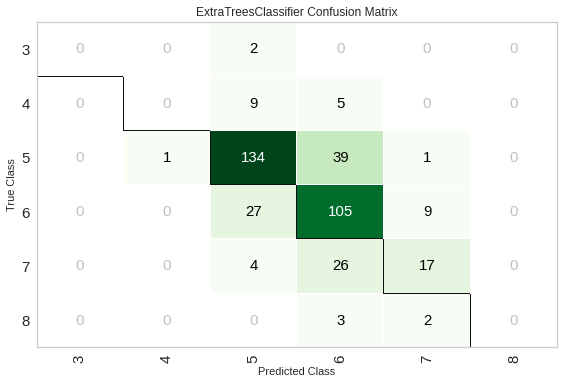

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [106]:
plot_model(et, plot = 'confusion_matrix')


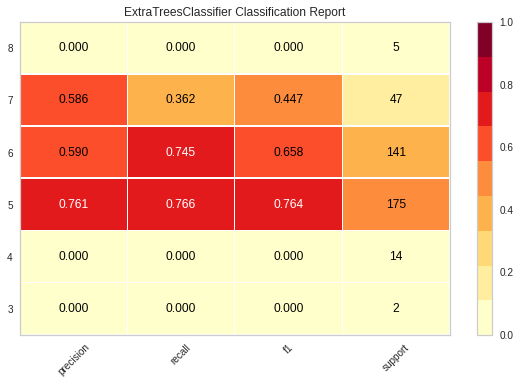

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [107]:
plot_model(et, plot = 'class_report')


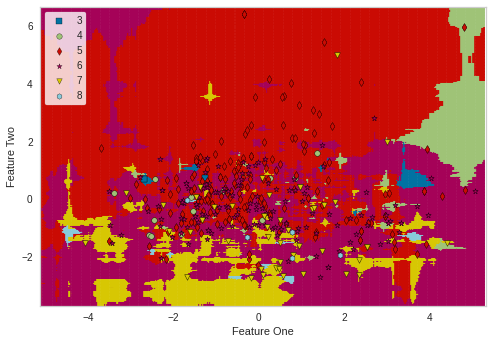

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [108]:
plot_model(et, plot='boundary')


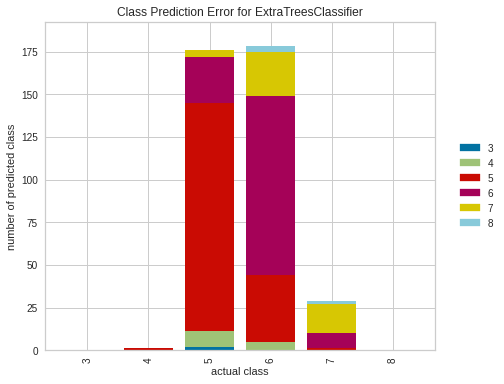

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [109]:
plot_model(et, plot = 'error')


In [110]:
evaluate_model(et)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [111]:
predict_model(et, raw_score='true')


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=true, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6667,0.8416,0.312,0.6353,0.6444,0.455,0.4606


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5
0,11.9,0.390,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.80,6,6,0.00,0.00,0.29,0.50,0.20,0.01
1,10.0,0.290,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.70,5,6,0.03,0.01,0.38,0.45,0.13,0.00
2,6.2,0.360,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.70,6,6,0.00,0.00,0.00,1.00,0.00,0.00
3,7.8,0.460,0.26,1.9,0.088,23.0,53.0,0.99810,3.43,0.74,9.20,6,6,0.00,0.00,0.22,0.76,0.02,0.00
4,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.20,5,5,0.01,0.02,0.60,0.33,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.50,5,5,0.02,0.20,0.59,0.19,0.00,0.00
380,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.50,6,6,0.01,0.03,0.35,0.54,0.07,0.00
381,6.0,0.540,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55,6,6,0.01,0.09,0.38,0.40,0.08,0.04
382,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.20,7,7,0.00,0.00,0.00,0.00,1.00,0.00


In [112]:
final_et = finalize_model(et)


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, mi

In [113]:
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [114]:
unseen_predictions = predict_model(final_et, data=data_unseen, raw_score='true')
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=true, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6875,0.8671,0.3789,0.6689,0.6694,0.503,0.5076


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5,0.00,0.18,0.48,0.34,0.00,0.0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5,0.00,0.01,0.51,0.48,0.00,0.0
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5,0.01,0.02,0.53,0.38,0.06,0.0
3,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,6,0.00,0.03,0.43,0.52,0.02,0.0
4,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,5,0.00,0.01,0.57,0.22,0.20,0.0


In [115]:
save_model(final_et,'Final ET Model 04Dec2022')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), model_name=Final ET Model 04Dec2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_f

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [118]:
saved_final_et = load_model('Final ET Model 04Dec2022')


INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final ET Model 04Dec2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [119]:
new_prediction = predict_model(saved_final_et, data=data_unseen, raw_score='true')

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='a

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6875,0.8671,0.3789,0.6689,0.6694,0.503,0.5076


In [120]:
new_prediction.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5,0.00,0.18,0.48,0.34,0.00,0.0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5,0.00,0.01,0.51,0.48,0.00,0.0
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5,0.01,0.02,0.53,0.38,0.06,0.0
3,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,6,0.00,0.03,0.43,0.52,0.02,0.0
4,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,5,0.00,0.01,0.57,0.22,0.20,0.0
